In [236]:
import sys
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

In [237]:
df = pd.read_csv("cassini250.csv")
df=df.values

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df,test_size=0.30,random_state=2)

In [239]:
dbscan_ = DBSCAN(eps=.3, min_samples=5,metric='euclidean').fit(X_train)
dbscan_.labels_

array([ 0,  1, -1,  1,  2,  2,  1,  3,  1,  1,  1,  1,  0,  0,  1,  1,  1,
        0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  2,  1,
        1, -1,  1,  1,  1,  1,  1,  0,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        0,  1,  1, -1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  0,  2,  0,
        0,  0,  1,  1,  1,  1,  1,  3,  0,  1,  1,  1,  1,  0,  0,  1,  1,
        1,  2,  1,  3,  1,  3,  0,  0,  1,  3,  2,  2,  0,  1,  0,  0,  3,
        1,  0,  1,  3,  0,  1,  3, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  3,  0,  1,  1,  2,  0,  0,  1,  1,  1,  1,  1,  2,  1,
        0,  0,  0,  1,  0,  0, -1,  1,  0,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  3,  1,  0,  3,
        2,  1,  0,  1])

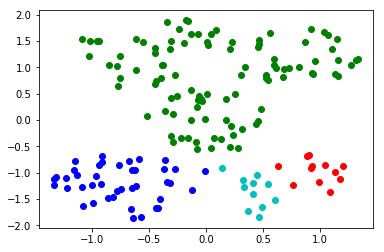

array([[-0.84842853,  1.06258021],
       [ 0.58786764, -1.1075236 ],
       [ 0.38010653,  1.35343299],
       [-0.34972564,  0.00516025],
       [ 0.43015635, -1.88615908],
       [-0.55222607, -0.03108948],
       [ 0.26908131,  0.17166814],
       [-1.32809069, -1.03656598],
       [ 0.36984751, -1.62726251],
       [ 0.03416202, -1.40694357],
       [-0.9985493 , -0.92677347],
       [ 1.08988223, -1.10301133],
       [-0.62215118,  1.45282651],
       [-0.21570976,  1.50694324],
       [-0.75353925,  0.86161264],
       [ 1.23995286, -1.19566718],
       [-0.98778044, -1.54121664],
       [ 0.83155551,  1.59465477],
       [-0.39160553, -0.28675338],
       [ 0.78197888,  0.65948699],
       [ 0.70239718,  1.30551956],
       [ 1.16664265,  1.1599864 ],
       [-0.53652731, -0.19782486],
       [ 0.52290087, -1.35133346],
       [ 0.04128991, -0.2456144 ],
       [ 1.00700314,  1.49599034],
       [-0.59719479, -0.96476037],
       [-0.07654069,  1.29045378],
       [ 0.58169813,

In [240]:
#plotting the clusters obtained for the training dataset
clusters=4
b=X_train
b1=np.array(b)
lo=[]
x_val1=[]
y_val1=[]
colors=['bo','go','ro','co','mo','yo','ko','bx','gx','rx','cx','mx','yx','kx','b-','g-','r-']
for i in range(0,clusters):
    for j in range(0,len(dbscan_.labels_)):
        if(dbscan_.labels_[j]==i):
           lo.append(b1[j])

    for k2 in lo:
        x_val1.append(float(k2[0]))
        y_val1.append(float(k2[1]))
        
    plt.plot(x_val1,y_val1,colors[i])
    lo=[]
    x_val1=[]
    y_val1=[]
plt.show()
X_test

In [241]:
'''Predicting the labels for testing datapoints.Since there exists no predefined function in sklearn dbscan for
prediction we need to define it manually'''
import scipy as sp

def dbscan_predict(dbscan_model, X_new):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 
    metric=sp.spatial.distance.euclidean
    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

y_pred=dbscan_predict(dbscan_,X_test)
y_pred

array([ 1,  3,  1,  1,  3,  1,  1,  0,  3, -1,  0,  2,  1,  1,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  3,  1,  1,  0,  1,  3,  1,  3,  1,  0,  1,
        1,  1,  1, -1,  1,  1,  0,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  3,  1,  1,  0,  1,  2,  0, -1,  0,  0,  2,  3,  2,  0,  0,  1,
        1,  1,  1,  1,  1,  3,  1])

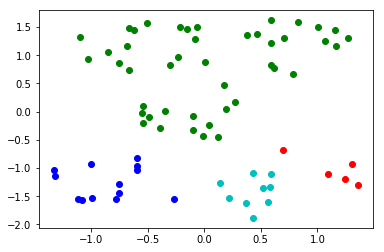

In [242]:
#plotting the clusters obtained for the testing dataset
b=X_test
b1=np.array(b)
lo=[]
x_val1=[]
y_val1=[]
colors=['bo','go','ro','co','mo','yo','ko','bx','gx','rx','cx','mx','yx','kx','b-','g-','r-']
for i in range(0,clusters):
    for j in range(0,len(y_pred)):
        if(y_pred[j]==i):
           lo.append(b1[j])

    for k2 in lo:
        x_val1.append(float(k2[0]))
        y_val1.append(float(k2[1]))
        
    plt.plot(x_val1,y_val1,colors[i])
    lo=[]
    x_val1=[]
    y_val1=[]
plt.show()

In [243]:
y_pred

array([ 1,  3,  1,  1,  3,  1,  1,  0,  3, -1,  0,  2,  1,  1,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  3,  1,  1,  0,  1,  3,  1,  3,  1,  0,  1,
        1,  1,  1, -1,  1,  1,  0,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  3,  1,  1,  0,  1,  2,  0, -1,  0,  0,  2,  3,  2,  0,  0,  1,
        1,  1,  1,  1,  1,  3,  1])